In [1]:
from pathlib import Path

import numpy as np

from epymorph.data_shape import Shapes
from epymorph.geo.adrio.census.lodes import Granularity, LodesGeography
from epymorph.geo.spec import AttribDef, CentroidDType, DynamicGeoSpec, Year

spec = DynamicGeoSpec(
    attributes=[
        AttribDef('label', np.str_, Shapes.N),
        AttribDef('home_geoid', np.str_, Shapes.N),
        AttribDef('work_geoid', np.str_, Shapes.N),
        AttribDef('commuters', np.int64, Shapes.NxN),
        AttribDef('commuters_29_under', np.int64, Shapes.NxN),
        AttribDef('commuters_30_to_54', np.int64, Shapes.NxN),
        AttribDef('commuters_55_over', np.int64, Shapes.NxN),
        AttribDef('commuters_1250_under_earnings', np.int64, Shapes.NxN),
        AttribDef('commuters_1251_to_3333_earnings', np.int64, Shapes.NxN),
        AttribDef('commuters_3333_over_earnings', np.int64, Shapes.NxN),
        AttribDef('commuters_goods_producing_industry', np.int64, Shapes.NxN),
        AttribDef('commuters_trade_transport_utility_industry', np.int64, Shapes.NxN),
        AttribDef('commuters_3333_over_earnings', np.int64, Shapes.NxN),
        AttribDef('all_jobs', np.int64, Shapes.NxN),
        AttribDef('primary_jobs', np.int64, Shapes.NxN),
        AttribDef('all_private_jobs', np.int64, Shapes.NxN),
        AttribDef('private_primary_jobs', np.int64, Shapes.NxN),
        AttribDef('all_federal_jobs', np.int64, Shapes.NxN),
        AttribDef('federal_primary_jobs', np.int64, Shapes.NxN)

    ],
    time_period=Year(2021),
    geography=LodesGeography(granularity=Granularity.STATE, filter={
        'state': ['04', '08', '32', '35'],
        'county': ['013', '041', '003', '001', '035'],
        'tract': ['*'],
        'block group': ['*'],
        'block': ['*']
    }),
    source={
        'label': 'LODES:name',
        'home_geoid': 'LODES',
        'work_geoid': 'LODES',
        'commuters': 'LODES',
        'commuters_29_under': 'LODES',
        'commuters_30_to_54': 'LODES',
        'commuters_55_over': 'LODES',
        'commuters_1250_under_earnings': 'LODES',
        'commuters_1251_to_3333_earnings': 'LODES',
        'commuters_3333_over_earnings': 'LODES',
        'commuters_goods_producing_industry': 'LODES',
        'commuters_trade_transport_utility_industry': 'LODES',
        'commuters_other_industry': 'LODES',
        'all_jobs': 'LODES',
        'primary_jobs': 'LODES',
        'all_private_jobs': 'LODES',
        'private_primary_jobs': 'LODES',
        'all_federal_jobs': 'LODES',
        'federal_primary_jobs': 'LODES'
    }
)

In [2]:
from epymorph.geo.adrio import adrio_maker_library
from epymorph.geo.dynamic import DynamicGeo

geo = DynamicGeo.from_library(spec, adrio_maker_library)

In [3]:
values = [geo['label'],
          geo['commuters']]

print(values)

04
08
32
35
49
('04', '08', '32', '35', '49')
State:  az
Fetching data from URL: https://lehd.ces.census.gov/data/lodes/LODES8/az/od/az_od_main_JT00_2021.csv.gz
Fetching data from URL: https://lehd.ces.census.gov/data/lodes/LODES8/az/od/az_od_aux_JT00_2021.csv.gz
Fetching data from cache...
Items in url_list:  https://lehd.ces.census.gov/data/lodes/LODES8/az/od/az_od_main_JT00_2021.csv.gz  :  2021_main_az_JT00
               w_geocode        h_geocode  S000  SA01  SA02  SA03  SE01  SE02  \
0        040019426001161  040179424002111     1     0     1     0     0     0   
1        040019426001161  040179425001012     1     0     1     0     0     1   
2        040019426001161  040179425003017     1     1     0     0     0     1   
3        040019426001161  040179601001010     1     0     0     1     1     0   
4        040019427001045  040019427002110     1     1     0     0     0     1   
...                  ...              ...   ...   ...   ...   ...   ...   ...   
2584302  0402798000

: 

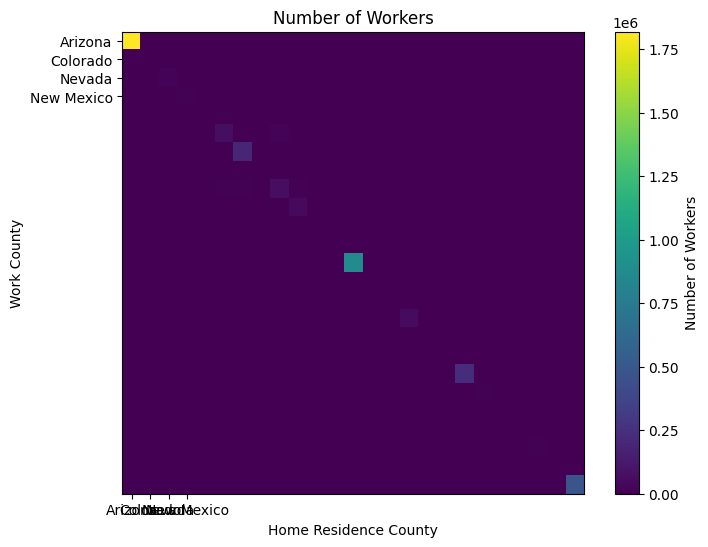

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Manually specify the labels for x and y axis
x_labels = ['Arizona', 'Colorado', 'Nevada', 'New Mexico']
y_labels = ['Arizona', 'Colorado', 'Nevada', 'New Mexico']

# Get the output matrix (commuters) from geo object
output_matrix = geo['commuters']

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(output_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of Workers')
plt.title('Number of Workers')

# Set tick labels for x-axis (destination)
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.xlabel('Home Residence County')

# Set tick labels for y-axis (origin)
plt.yticks(np.arange(len(y_labels)), y_labels)
plt.ylabel('Work County')

plt.show()